# Naive Bayes

[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 7 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 4 0]
 [0 0 0 0 0 1]]
Accuracy Score:  1.0
              precision    recall  f1-score   support

        jahe       1.00      1.00      1.00         1
      kencur       1.00      1.00      1.00         1
       kunci       1.00      1.00      1.00         7
      kunyit       1.00      1.00      1.00         1
        laos       1.00      1.00      1.00         4
   temulawak       1.00      1.00      1.00         1

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



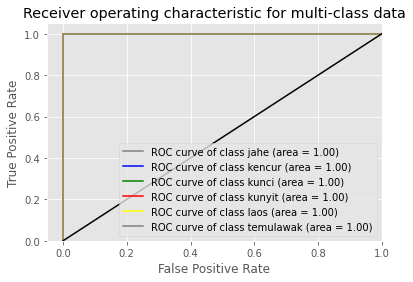

In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# Membaca file Excel
dataframe = pandas.read_excel("datasetpca.xlsx", header = None)
dataset = dataframe.values
X = dataset[:,0:1000].astype(float)
y = dataset[:,1000]

# Membagi dataset menjadi data training dan testing
# Training = 80%, Testing = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
, random_state=0)

# Membuat model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
clf = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print (cm)

# Menggunakan skor akurasi untuk mendapatkan akurasi dari model
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)

print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
y_score = model.predict_proba(X_test)
from sklearn.preprocessing import label_binarize

classes = ['jahe', 'kencur', 'kunci', 'kunyit', 'laos', 'temulawak']

# Mengubah output menjadi biner
y_test = label_binarize(y_test, classes=classes)
n_classes = y_test.shape[1]
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')

# Plotting dan estimasikan FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['gray', 'blue', 'green', 'red', 'yellow'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

Accuracy Score: 0.9333333333333333
              precision    recall  f1-score   support

        jahe       0.67      1.00      0.80         2
      kencur       1.00      1.00      1.00         1
       kunci       1.00      1.00      1.00         4
      kunyit       1.00      1.00      1.00         2
        laos       1.00      0.80      0.89         5
   temulawak       1.00      1.00      1.00         1

    accuracy                           0.93        15
   macro avg       0.94      0.97      0.95        15
weighted avg       0.96      0.93      0.94        15



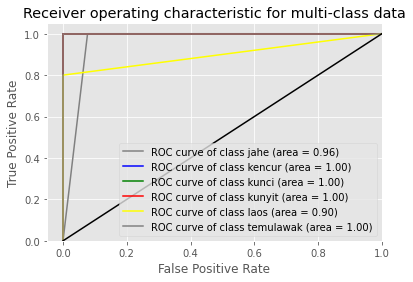

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
y_score = clf.predict_proba(X_test)
from sklearn.preprocessing import label_binarize


# Membaca file Excel
df= pd.read_excel("datasetpca.xlsx", header=None)
dataset = df.values
X = dataset[:,0:1000:].astype(float)
y = dataset[:,1000]

# Membagi dataset menjadi data training dan testing
# Training = 70%, Testing = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Membuat Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Prediksi respons dataset test
y_pred = clf.predict(X_test)

# Menggunakan skor akurasi untuk mendapatkan akurasi dari model
print("Accuracy Score:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

classes = ['jahe', 'kencur', 'kunci', 'kunyit', 'laos', 'temulawak']

# Mengubah output menjadi biner
y_test = label_binarize(y_test, classes=classes)
n_classes = y_test.shape[1]
from matplotlib import pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
plt.style.use('ggplot')

# Plotting dan estimasikan FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['gray', 'blue', 'green', 'red', 'yellow'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


# Deep Learning RNN

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Membaca file Excel
dataframe = pandas.read_excel("datasetpca.xlsx", header = None)
dataset = dataframe.values
ilabel = 1000
jclass = 6
X = dataset[:,0:ilabel].astype(float)
Y = dataset[:,ilabel]

# Encode nilai kelas sebagai integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# Konversi integers menjadi variable dummy
dummy_y = np_utils.to_categorical(encoded_Y)

# Membuat model
model = Sequential()
model.add(Dense(8, input_dim=ilabel, activation='relu'))
model.add(Dense(jclass, activation='softmax'))

# Mengcompile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nepochs = 200
nbatch = 5

# ------------ menggunakan packages
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.20)

model.fit(X_train, y_train, epochs=nepochs, batch_size=nbatch)
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy Score: %.2f' % (accuracy*100))

model.save_weights("model.h5")
y_score = model.predict(X_test)
y_score
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + '%')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan', 'purple'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# SVMs

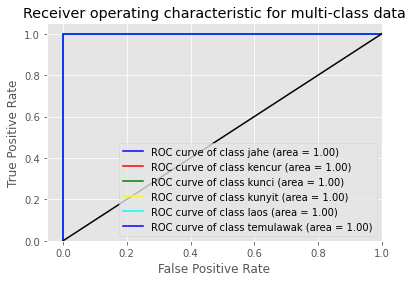

Accuracy Score:  0.9333333333333333
              precision    recall  f1-score   support

        jahe       0.50      1.00      0.67         1
      kencur       1.00      1.00      1.00         1
       kunci       1.00      1.00      1.00         7
      kunyit       0.00      0.00      0.00         1
        laos       1.00      1.00      1.00         4
   temulawak       1.00      1.00      1.00         1

    accuracy                           0.93        15
   macro avg       0.75      0.83      0.78        15
weighted avg       0.90      0.93      0.91        15



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
import pandas
plt.style.use('ggplot')

# Membaca file Excel
dataframe = pandas.read_excel("datasetpca.xlsx", header = None)
dataset = dataframe.values
X = dataset[:,0:1000].astype(float) 
y = dataset[:,1000]
classes = ['jahe', 'kencur', 'kunci', 'kunyit', 'laos', 'temulawak']

# Mengubah output menjadi biner
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]
# Membagi dataset menjadi data training dan testing
# Training = 80%, Testing = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size
= 0.2, random_state=0)
# Mendefinisikan model sebagai SVC dalam pengaturan OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True
))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
# Plotting dan estimasikan FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()
# Membagi dataset menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
# Model
classifier_svc = svm.SVC(kernel='rbf',random_state=0)
# Fit model dengan training set
classifier_svc.fit(X_train, y_train)
# Prediksi labels/classes dari test set
y_pred = classifier_svc.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

# Menggunakan skor akurasi untuk mendapatkan akurasi dari model
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc)
print(classification_report(y_test, y_pred))

# Resize Photo

In [ ]:
import PIL
import os
import os.path
from PIL import Image

f = r'D:\FP AB\Upaya Peningkatan (Dataset Resize)'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((100,100))
    img.save(f_img)

# Merge CSV and Export to Excel

In [ ]:
from pandas.core.indexes.range import RangeIndex
import pandas as pd
import numpy as np
import os

PC = 10
width = 100
formatPrint = "PC{col}.{row}"
columnName = ['label']

for i in range(PC):
    for j in range (width):
        columnName.append(formatPrint.format(col = i+1, row = j+1))
dataframe = pd.DataFrame(columns=columnName)
directory = 'csv/'

for filename in os.listdir('csv'):
    if filename.endswith(".csv"):
        df = pd.read_csv(directory + filename, float_precision='round_trip')
        df.pop('Unnamed: 0')
        array = df.transpose().to_numpy().flatten()
        label = os.path.splitext(filename)[0]
        data = [label]
        dd = array.tolist()
        data = data + dd
        dataframe.loc[len(dataframe)] = data

dataframe.to_excel('datasetpca.xlsx')